In [3]:
#PANDAS a été développer spécifiquement pour attaquer des problèmes qui évoluent avec le temps
#BITCOPIN ET Time Series
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
bitcoin = pd.read_csv('BTC-EUR.csv')

In [5]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,5728.166504,5807.108398,5725.994629,5788.325195,5788.325195,3462659600
1,2018-10-09,5789.064453,5793.401367,5754.208496,5772.573730,5772.573730,3111788285
2,2018-10-10,5770.531250,5771.002930,5681.205566,5710.787109,5710.787109,3284543913
3,2018-10-11,5711.836426,5712.000977,5386.949219,5397.446289,5397.446289,4470356475
4,2018-10-12,5382.788574,5454.762207,5380.277832,5425.629395,5425.629395,3271592547


<Axes: >

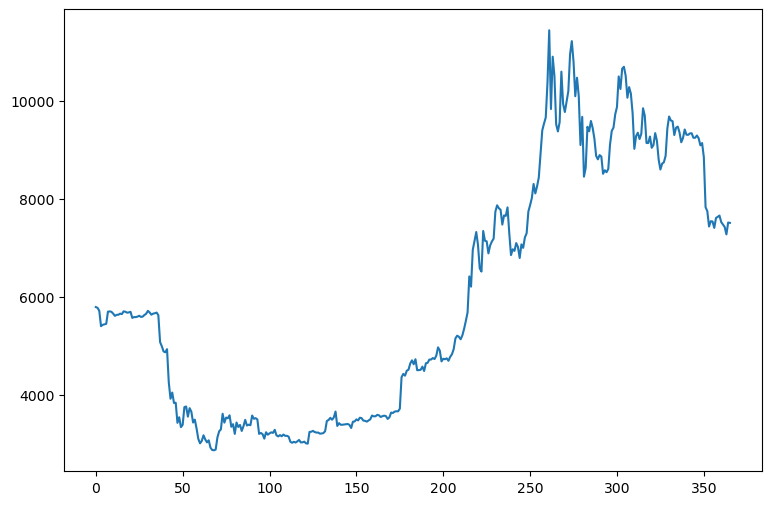

In [6]:
#L'evolution de la valeur 'close'
bitcoin['Close'].plot(figsize=(9, 6))

In [7]:
#La on va indiquer à pandas qu'on veut travailler sur une base temporelle 
bitcoin.index

RangeIndex(start=0, stop=366, step=1)

In [8]:
#Date TIME INDEX
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

# la colonne d'index doit comprendre nos différents dates ce qui va remplacer la colonne d'index en haut de notre data frame
#Notre colonne doit être interpretter comme étant une date avec "pars_dates=True"

In [9]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-08,5728.166504,5807.108398,5725.994629,5788.325195,5788.325195,3462659600
2018-10-09,5789.064453,5793.401367,5754.208496,5772.573730,5772.573730,3111788285
2018-10-10,5770.531250,5771.002930,5681.205566,5710.787109,5710.787109,3284543913
2018-10-11,5711.836426,5712.000977,5386.949219,5397.446289,5397.446289,4470356475
2018-10-12,5382.788574,5454.762207,5380.277832,5425.629395,5425.629395,3271592547


In [10]:
bitcoin.index

DatetimeIndex(['2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
               '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15',
               '2018-10-16', '2018-10-17',
               ...
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04', '2019-10-05', '2019-10-06',
               '2019-10-07', '2019-10-08'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

C:\Users\JoJo_\AppData\Local\Temp\ipykernel_19336\2865550368.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].plot()


<Axes: xlabel='Date'>

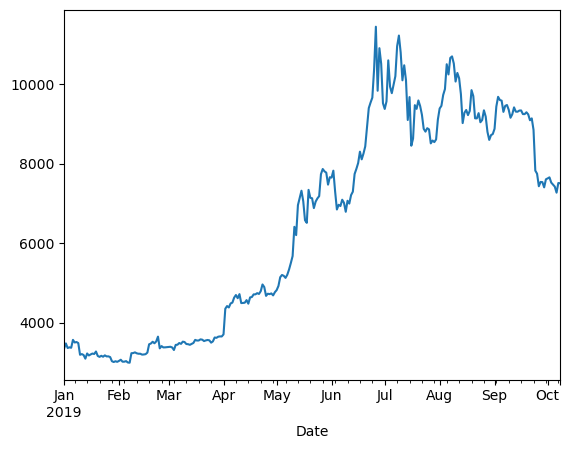

In [11]:
#Maintenant on peuit commencer nos analyses
#l'évolution du bitcoin en 2019
bitcoin['2019']['Close'].plot()

C:\Users\JoJo_\AppData\Local\Temp\ipykernel_19336\80518107.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019-09']['Close'].plot()


<Axes: xlabel='Date'>

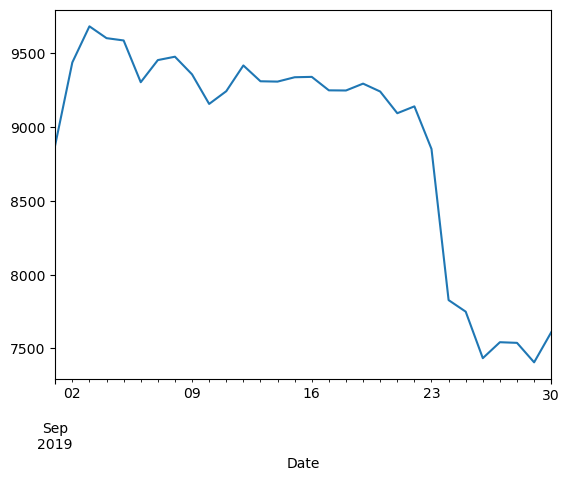

In [12]:
#bitcoin en septembre 2019
bitcoin['2019-09']['Close'].plot()

<Axes: xlabel='Date'>

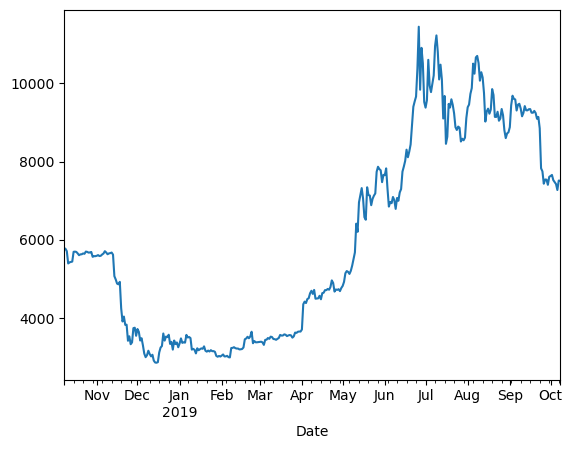

In [13]:

bitcoin['2017':'2019']['Close'].plot()

<Axes: xlabel='Date'>

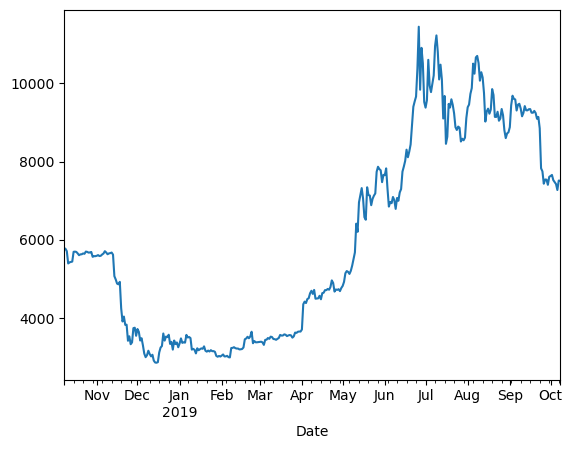

In [14]:

bitcoin.loc['2017':'2019']['Close'].plot()

In [15]:
#Pandas s'adapte au format de date
#"pd.to_datetime(2019/03/20)" = fonction ajoute la date si pandas n'arrive pas  à effectuer une conversion
#Dans cette fonction pon poeut également mettre des heures minutes secondes jusqu'au nano seconde ou même plus loins

Date
2019-01-31    Axes(0.125,0.11;0.775x0.77)
2019-02-28    Axes(0.125,0.11;0.775x0.77)
2019-03-31    Axes(0.125,0.11;0.775x0.77)
2019-04-30    Axes(0.125,0.11;0.775x0.77)
2019-05-31    Axes(0.125,0.11;0.775x0.77)
2019-06-30    Axes(0.125,0.11;0.775x0.77)
2019-07-31    Axes(0.125,0.11;0.775x0.77)
2019-08-31    Axes(0.125,0.11;0.775x0.77)
2019-09-30    Axes(0.125,0.11;0.775x0.77)
2019-10-31    Axes(0.125,0.11;0.775x0.77)
Freq: M, Name: Close, dtype: object

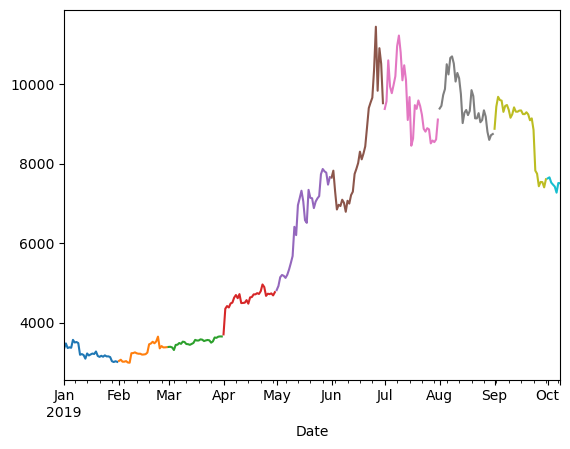

In [16]:
#resample=fonction permet de nos données selon une fréquence temporelle

bitcoin.loc['2019','Close'].resample('M').plot()

<Axes: xlabel='Date'>

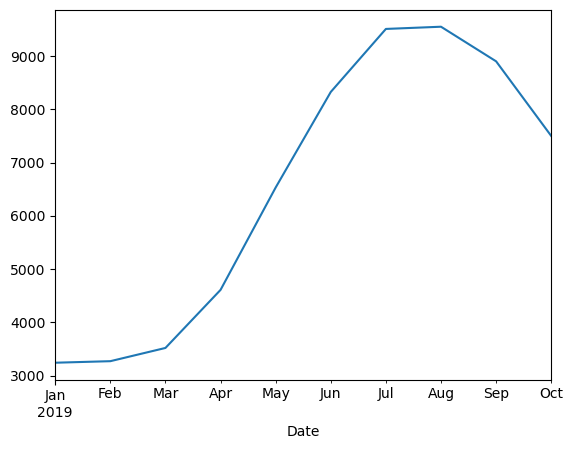

In [17]:
#Et vu q'on cherche une statistique on va chercher une moyenne par exemple
#le m en () = mois donc w=week
bitcoin.loc['2019','Close'].resample('M').mean().plot()

<Axes: xlabel='Date'>

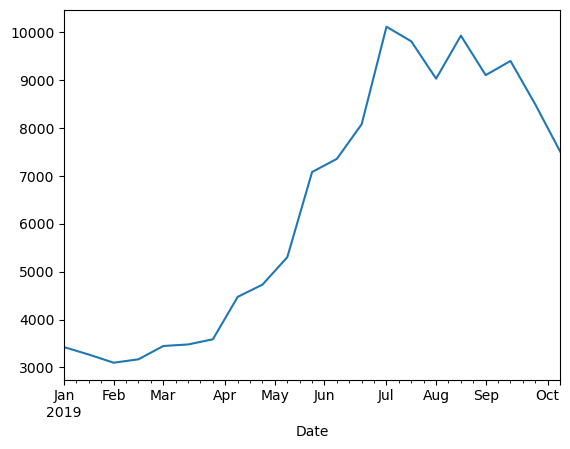

In [18]:
#ou toute les 2 semaines
bitcoin.loc['2019','Close'].resample('2w').mean().plot()

<Axes: xlabel='Date'>

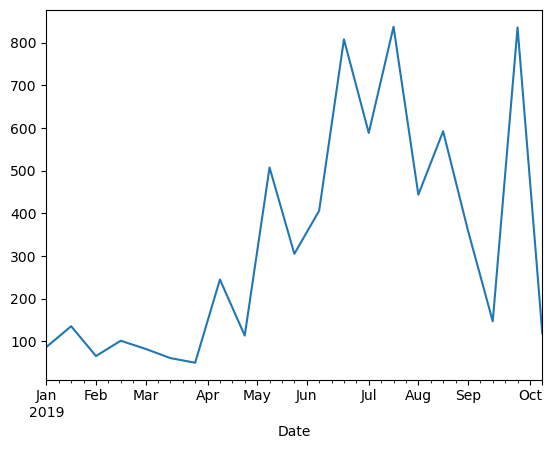

In [19]:
#Ecart type
bitcoin.loc['2019','Close'].resample('2W').std().plot()

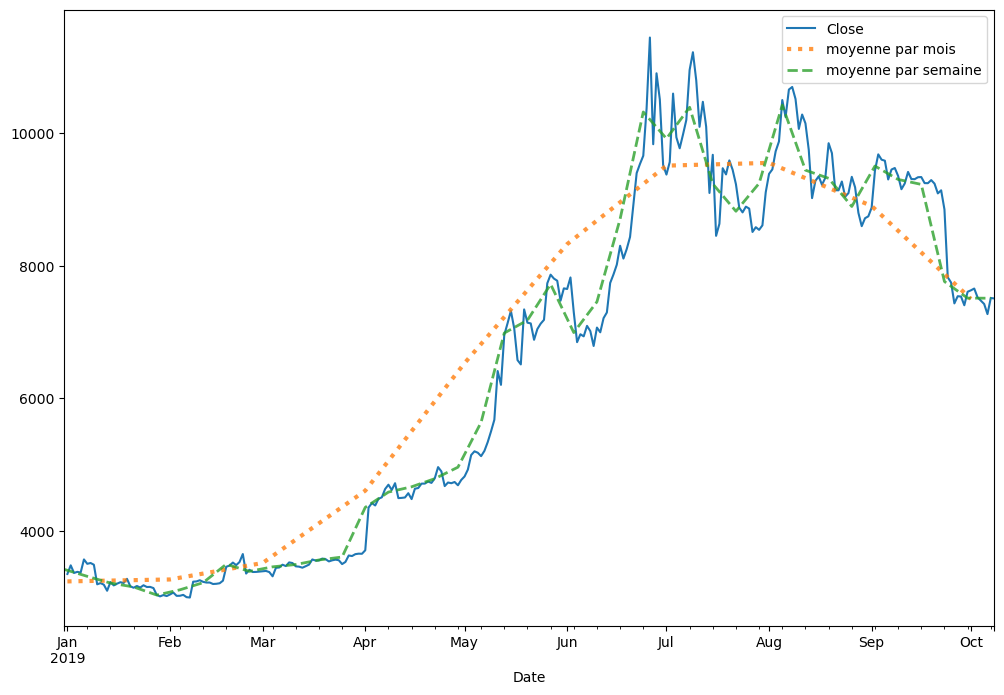

In [20]:
#En pratique
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()


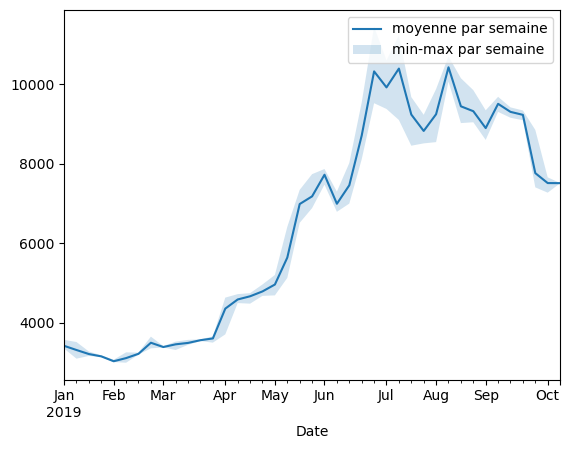

In [21]:
#.agg = permet de rasssembler +s stat. dans un tableau qu'on souhaite passer par dessus .resample

m = bitcoin.loc['2019','Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
#fill_between crée l'incertidue entre le max et min de chaque semaine
plt.legend()

In [22]:
#Moving Average
#technique qui calcule une moyenne sur une valeur (comme une semaine par exepmle, puis un jour puis etc etc)
bitcoin.loc['2019','Close'].rolling(window=7)

Rolling [window=7,center=False,axis=0,method=single]

<Axes: xlabel='Date'>

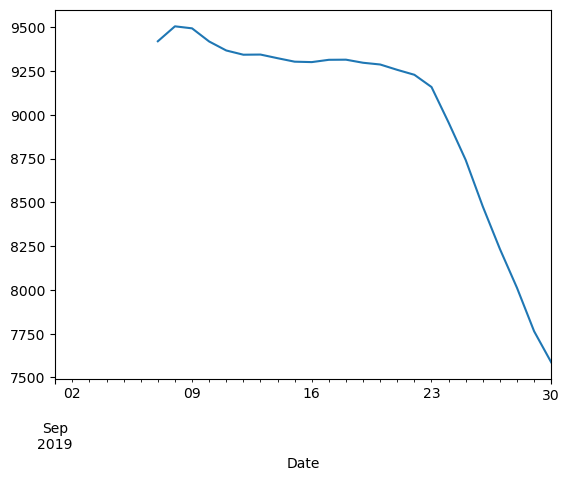

In [23]:
bitcoin.loc['2019-09','Close'].rolling(window=7).mean().plot()

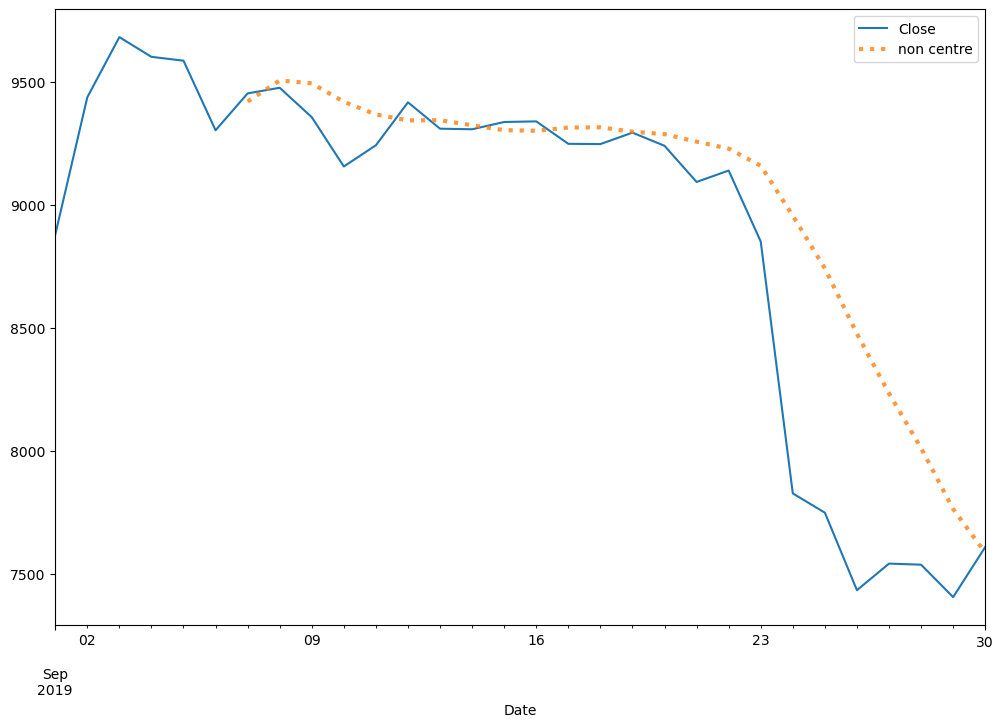

In [24]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)


plt.legend()


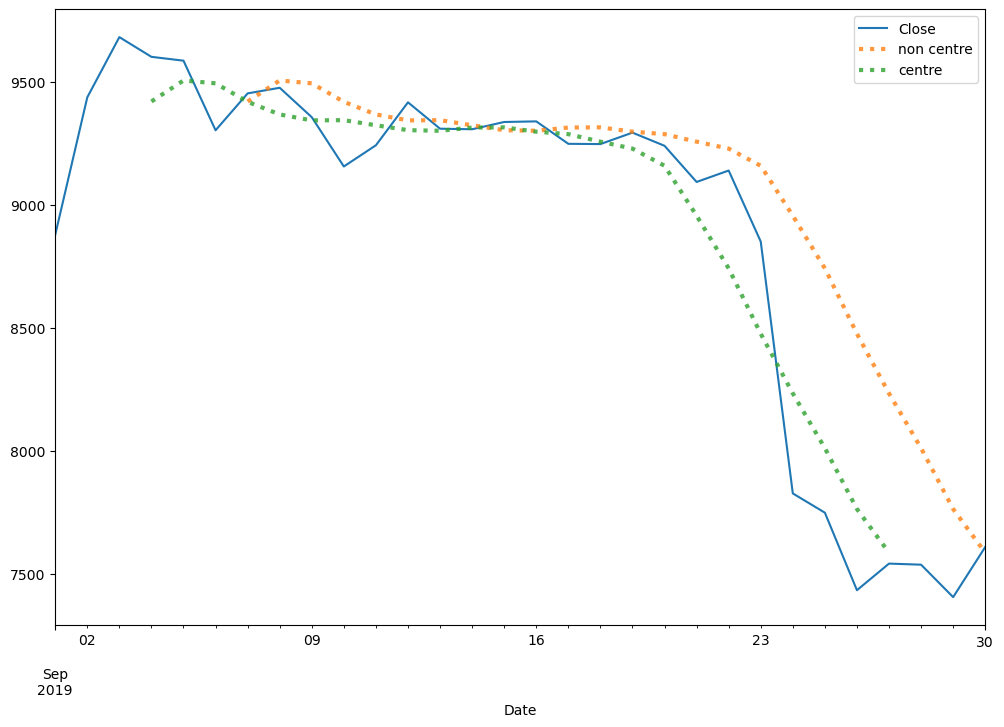

In [25]:
#elle redécale toute le valeur au milieu de leur fenetre avec center=True
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)

plt.legend()

In [41]:
#EXP WEIGHTED AVERAGE FUNCTION(MOYENNE MOBILE EXPONENTIELLE)
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='centre', lw=3, ls=':', aplha=0.8)
#à voir, je crois que alpha dans 'ewm(alpha)' ne peut commencer à partir de 0.5
plt.legend()
#ici dans notre graphique ewm suit un peu mieux la tendance de bitcoin que nos moving average qu'on avait auparavant

AttributeError: Line2D.set() got an unexpected keyword argument 'aplha'

In [ ]:
#Dans boucle FOR
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):#création d'un tableau numpy ici
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)


plt.legend()

In [ ]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [ ]:
ethereum.loc['2023','Close'].plot()

In [ ]:
#on va rassembler ces 2 data frames ensemble
#'on=' = où l'assemblage va s'effectuer; ici Date vu que les 2 ont les même valeurs
#'how=' = la façon dont l'assemblage doit s'éffectuer
pd.merge(bitcoin, ethereum, on='Date', how='inner')
#x = btc; y= eth
#toute nos données du bitcoin après 2019 ont été mis à la poubelle
#du à la méthode inner qui a permit l'assemblage des 2 data frames sur les éléments qu'ils ont en commun

In [ ]:
pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

#x = btc; y= eth

In [ ]:
pd.merge(bitcoin, ethereum, on='Date', how='outer', suffixes=('_btc', '_eth'))

#ici la ùméthode 'outer' va assembler les 2 data frames sur tout l'étendue de nos index mais les données qu'ils ne partagen pas
#le Nan pour les colonnes de btc sont just des datas qui n'exist pas tout simplement

In [ ]:
# plus pratique à afficher toute nos données
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

In [ ]:
btc_eth[['Close_btc', 'Close_eth']]

In [ ]:
btc_eth[['Close_btc', 'Close_eth']].plot(figsize=(12, 8))
#lectuer de la graphique un peu compliqué parceque nos deux datas ne comporte pas la même échelle

In [27]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

NameError: name 'btc_eth' is not defined

In [28]:
#maintenant on va calculer la corrélation

correlations = btc_eth[['Close_btc', 'Close_eth']].corr()

btc_eth[['Close_btc', 'Close_eth']].corr()

NameError: name 'btc_eth' is not defined

In [29]:
import seaborn as sns
sns.heatmap(correlations)

NameError: name 'correlations' is not defined

In [ ]:
""""

Exercice: TRADING STRATEGY
On va utiliser la strategy du tortue (Turtle Strategy) afin de décider quand acheter ou vendre du bitcoin
Comment procéder?
1)Utiliser rolling() pour calculer:
max sur les 28 derniers jours
min sur les 28 derniers jours
2) Boolean indexing:
Si 'Close'>max28 alors Buy=1
Si 'Close'<min 28 Sell=-1

bitcoin['Buy']=np.zeros(len(bitcoin))
bitcoin['Sell']=np.zeros(len(bitcoin))

In [34]:
btc_eth[['Close_btc', 'Close_eth']].diff().plot()
#le variation le jour de jour en graphique
#on observe des variations extrèmes

NameError: name 'btc_eth' is not defined

In [35]:
%matplotlib

Using matplotlib backend: <object object at 0x0000017C00E94180>


In [42]:
#SOLUTION

data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [43]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

In [44]:
start = '2019'
end = '2019'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].plot(data['close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])

KeyError: ('close', 'min', 'max')